In [26]:
from dmp_discrete import *
import scipy.io as scio

In [27]:
# import data
data = '../sample/trajData.mat'
data = scio.loadmat(data)
locxy = data['trajData']# location info
data = '../sample/trajSigma.mat'
data = scio.loadmat(data)
locz = data['trajSigma']# thickness info
num_stroke=np.shape(locz)[0]# num of stroke
num_step=np.shape(locz)[1]# num of step

In [28]:
# generate trajectory
track=np.zeros((3*num_stroke,num_step))
speed=np.zeros((3*num_stroke,num_step))
acc=np.zeros((3*num_stroke,num_step))
# learning
for stroke in range(num_stroke):
    # read data
    y_demo = np.zeros((2,num_step))
    y_demo[0,:]=locxy[stroke*3+1,:]
    y_demo[1,:]=locxy[stroke*3+2,:]
    #y_demo[2,:]=locz[stroke,:]

    # dmp learning and reproduce
    dmp = dmp_discrete(n_dmps=2, n_bfs=500, dt=1.0/num_step)
    dmp.learning(y_demo, plot=False)

    # dmp reproduce
    initial=np.multiply([1,0.8],y_demo[:,0]).tolist()
    #initial[2]=0
    goal=np.multiply([1,0.8],y_demo[:,-1]).tolist()
    #goal[2]=0.05
    y_reproduce, dy_reproduce, ddy_reproduce = dmp.reproduce(tau=1, initial=initial, goal=goal)

    # save data
    track[stroke*3:stroke*3+2,:]=y_reproduce.transpose()
    track[stroke*3+2,:]=locz[stroke,:]

    

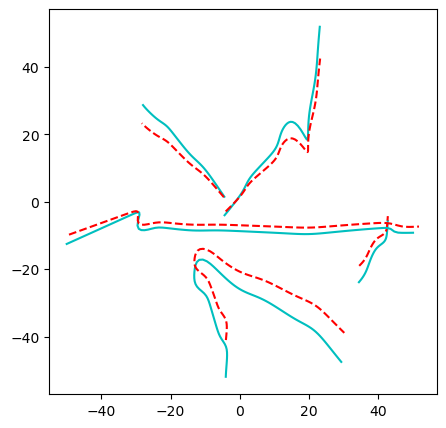

In [29]:
plt.figure(figsize=(5, 5))
for stroke in range(num_stroke):
    plt.plot(locxy[stroke*3+1,:], locxy[stroke*3+2,:],'c')
    plt.plot(track[stroke*3,:], track[stroke*3+1,:],'r--')

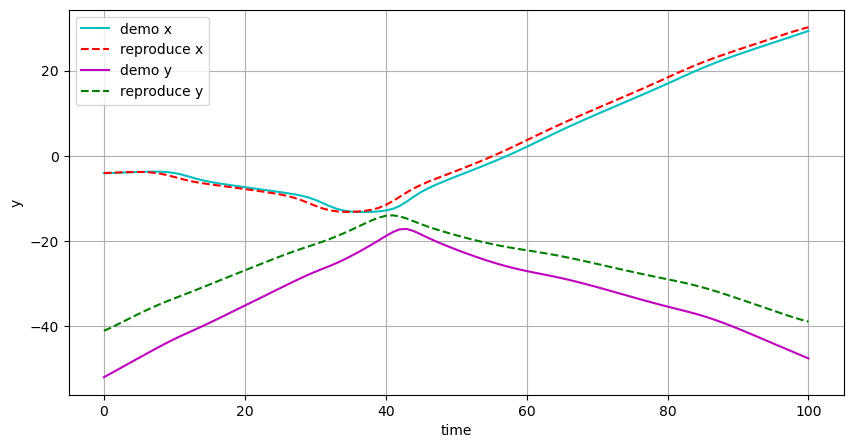

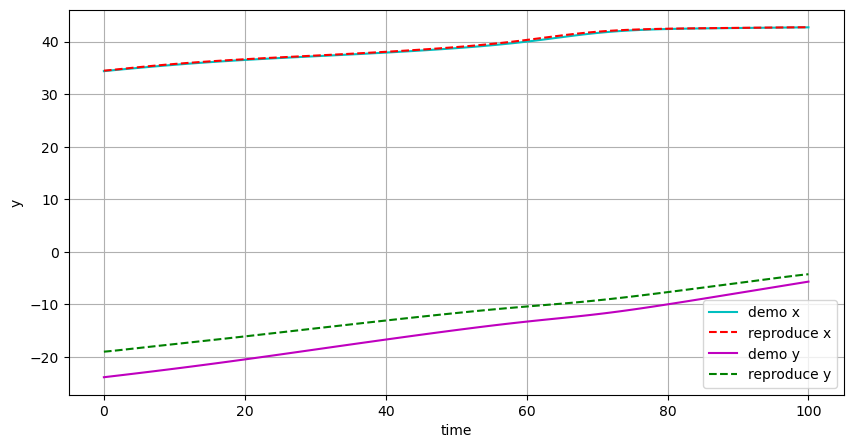

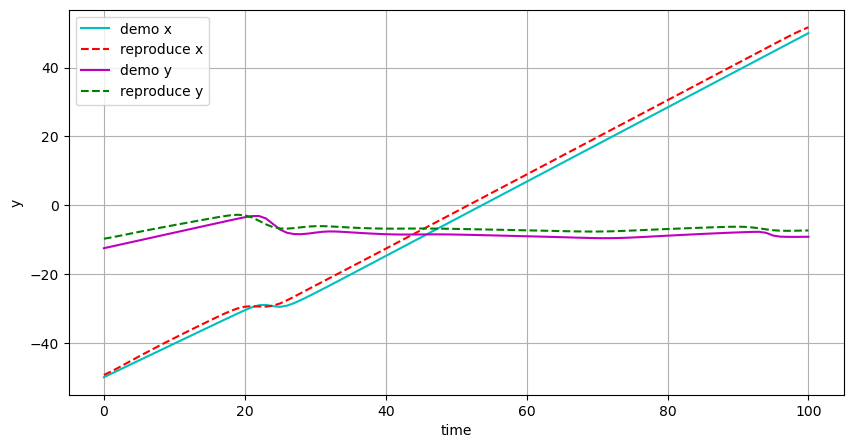

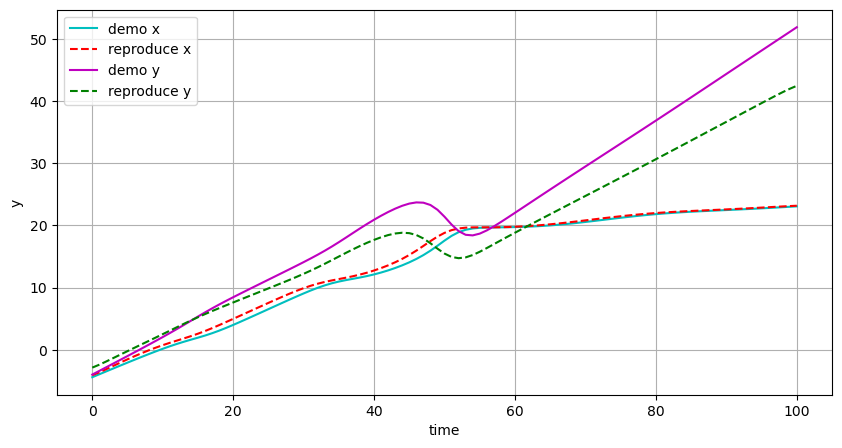

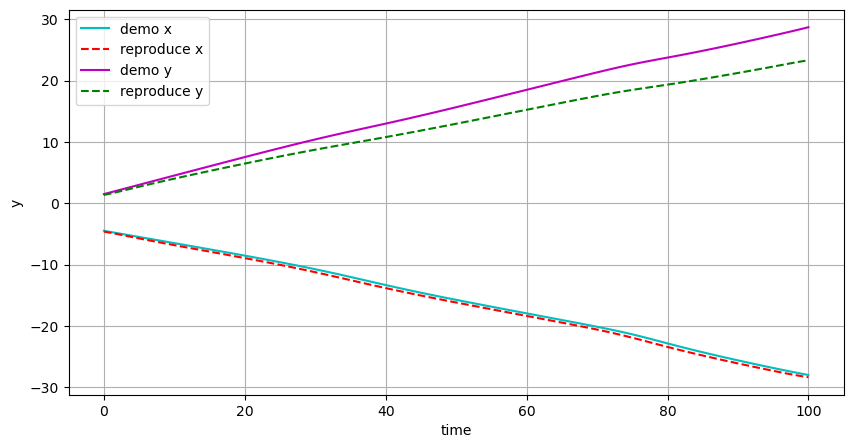

In [30]:
# plot
for stroke in range(num_stroke):
    plt.figure(figsize=(10, 5))
    plt.plot(locxy[stroke*3+1,:], 'c', label='demo x')
    plt.plot(track[stroke*3,:], 'r--', label='reproduce x')
    plt.plot(locxy[stroke*3+2,:], 'm', label='demo y')
    plt.plot(track[stroke*3+1,:], 'g--', label='reproduce y')
    plt.legend()
    plt.grid()
    plt.xlabel('time')
    plt.ylabel('y')
    plt.show()

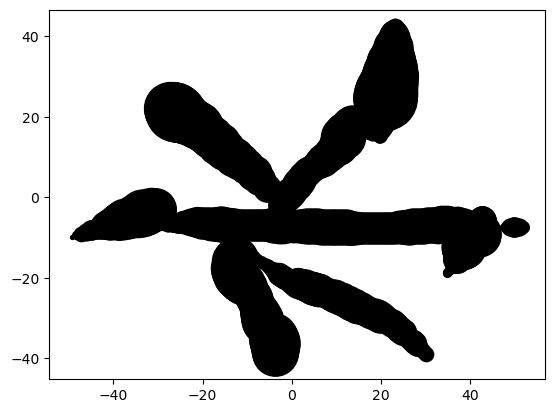

In [31]:
plt.figure()
for stroke in range(num_stroke):
    for step in range(num_step):
        plt.scatter(track[stroke*3,step], track[stroke*3+1,step], s=track[stroke*3+2,step]**2*3.14*10,c='k')

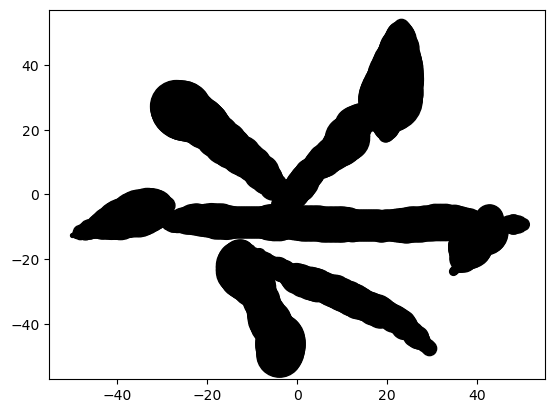

In [32]:
plt.figure()
for stroke in range(num_stroke):
    for step in range(num_step):
        plt.scatter(locxy[stroke*3+1,step], locxy[stroke*3+2,step], s=locz[stroke,step]**2*3.14*10,c='k')